# Distribuzione file del Dataset in seguito alle fasi di Preprocessing

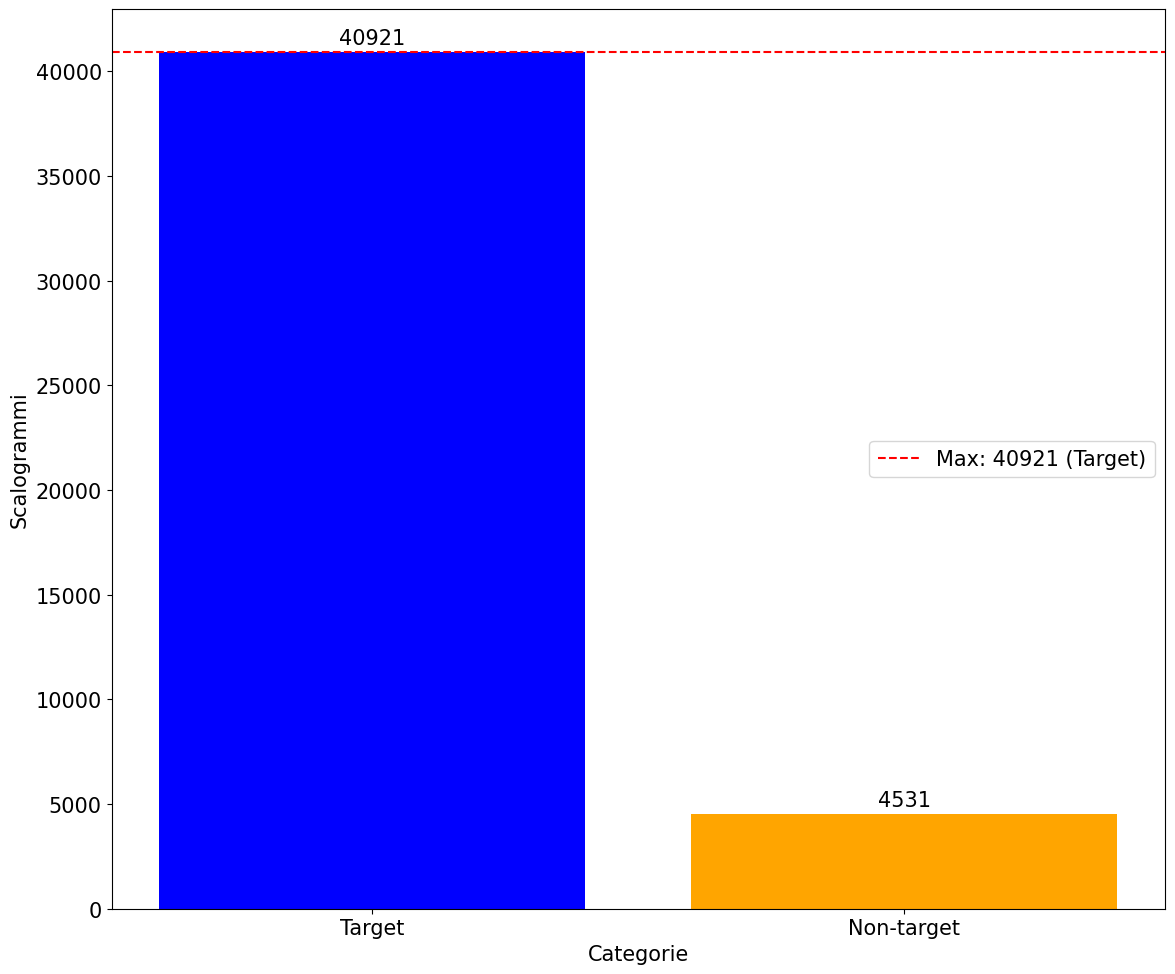

In [8]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt

# Function to count files in a folder
def count_files_in_folder(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

# Paths to the main directory and its subdirectories
main_folder_path = 'C:\\Users\\biagi\\PycharmProjects\\gruppo17\\Esperimento 2 Binary\\Allenamento_Norm'
target_path = os.path.join(main_folder_path, 'Target')
non_target_path = os.path.join(main_folder_path, 'Non-target')

# Get file counts
target_count = count_files_in_folder(target_path)
non_target_count = count_files_in_folder(non_target_path)

# Prepare data for plotting
counts = {'Target': target_count, 'Non-target': non_target_count}

# Determine max count and corresponding folder
max_count = max(counts.values())
max_folder = max(counts, key=counts.get)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))  # Increased height to 10
plt.rcParams.update({'font.size': 15})

# Bar plot
bars = ax.bar(counts.keys(), counts.values(), color=['blue', 'orange'])

# Add labels and title
ax.set_xlabel('Categorie')
ax.set_ylabel('Scalogrammi')

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Add a horizontal line for the max value
ax.axhline(y=max_count, color='red', linestyle='--', label=f'Max: {max_count} ({max_folder})')
ax.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Distribuzione dei file nelle classi minoritarie

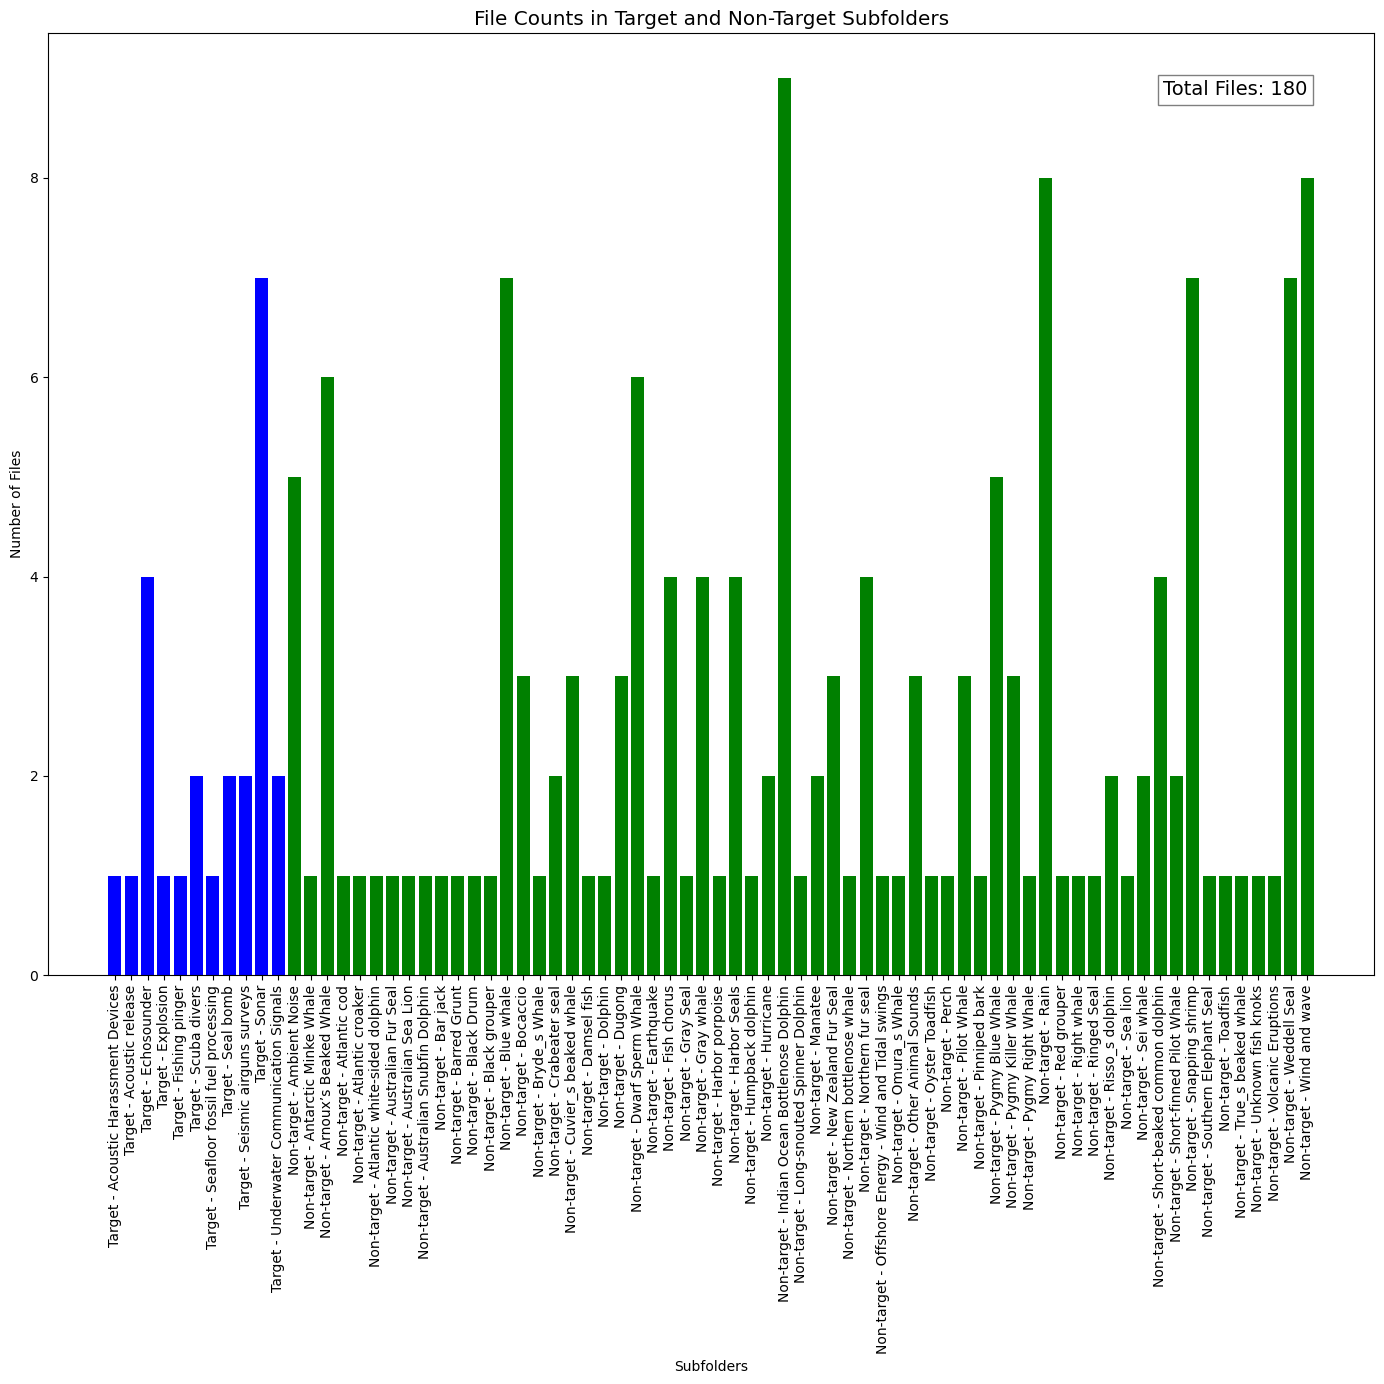

In [1]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt

# Function to count files in each subfolder
def count_files_in_subfolders(parent_folder):
    subfolder_counts = {}
    for subfolder in os.listdir(parent_folder):
        subfolder_path = os.path.join(parent_folder, subfolder)
        if os.path.isdir(subfolder_path):
            file_count = sum([len(files) for r, d, files in os.walk(subfolder_path)])
            subfolder_counts[subfolder] = file_count
    return subfolder_counts

# Paths to the Target and non-target directories
target_path = r'C:\Users\biagi\PycharmProjects\gruppo17\Altro\Target'
non_target_path = r'C:\Users\biagi\PycharmProjects\gruppo17\Altro\Non-Target'

# Get file counts
target_counts = count_files_in_subfolders(target_path)
non_target_counts = count_files_in_subfolders(non_target_path)

# Combine target and non-target counts
combined_counts = {**{f'Target - {k}': v for k, v in target_counts.items()},
                   **{f'Non-target - {k}': v for k, v in non_target_counts.items()}}

# Plotting
fig, ax = plt.subplots(figsize=(14, 14))
plt.rcParams.update({'font.size': 12})

# Plot combined data
colors = ['blue' if 'Target' in key else 'green' for key in combined_counts.keys()]
ax.bar(combined_counts.keys(), combined_counts.values(), color=colors)
ax.set_title('File Counts in Target and Non-Target Subfolders')
ax.set_xlabel('Subfolders')
ax.set_ylabel('Number of Files')
ax.tick_params(axis='x', rotation=90)  # Rotate x labels

# Calculate and annotate the total number of files
total_files = sum(combined_counts.values())
ax.text(0.95, 0.95, f'Total Files: {total_files}', transform=ax.transAxes,
        fontsize=14, verticalalignment='top', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
